# Анализ оттока клиентов банка

Цель: поиск параметров максимально влияющих на отток клиентов. Прогнозирование оттока клиентов.

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

**Загрузка библиотек**

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
data = pd.read_csv("C:/Users/kast1/Desktop/практикум/выпускной/bank_dataset.csv")

In [127]:
data

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


## 1. Предобработка данных

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 859.4+ KB


In [129]:
data.describe()

,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [130]:
data.duplicated().sum()

0

In [131]:
data = data.rename(columns={"userid": "user_id", "Age": "age", 'City':'city', 'Gender':'gender', 'Objects':'objects', 'Balance':'balance', 'Products':'products', 'CreditCard':'credit_card', 'Loyalty':'loyalty', 'Churn':'churn'})

# Вывод

В данных не обнаружено дубликатов. Были переменованы столбцы. В столбце Balance есть пропуски - почти 47%, это много, и нет технической возможности выяснить с чем связаны пропуски. Вероятно, баланс это остаток средств на дебетовой карте на какой-то момент времени, а там где пропущены значения у клиентов нет дебетовой карты (например, только кредитная карта, страховка или другие банковские продукты). Заполнять пропуски не следует, так как это может изменить распределение признака.

# 2. Исследовательский анализ данных

**1. Расчитаем общий отток**

In [133]:
stayed = data.query('churn == 0')
stayed.shape[0]

7963

In [134]:
leaved = data.query('churn == 1')
leaved.shape[0]

2037

In [135]:
data_size = data.shape[0]
data_size

10000

Почти 80% клиентов остаются, 20 % уходят.

**2. Корреляционный анализ**

In [136]:
correlation = data.corr()

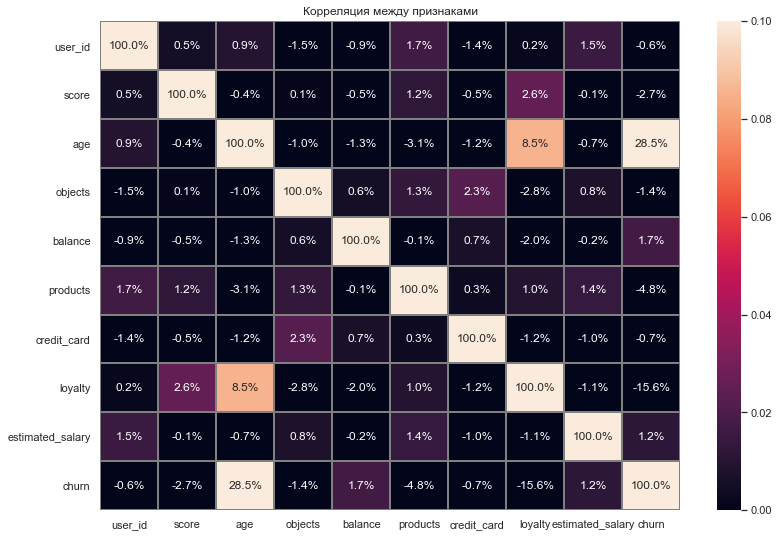

In [137]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Корреляция между признаками')
sns.heatmap(correlation, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin=0, vmax=0.1); 

Наибольшие зависимости можно выделить между возрастом по отношению к оттоку (28,5%). Связи между переменными до 30 % считаются очень слабыми. Сильно линейно зависимых друг от друга признаков нет.

**3. Изучение распределений признаков, выделение аномалий/выбросов**

разделим признаки на качественные и количественные:

In [138]:
binar_feature = ['gender', 'city', 'credit_card', 'loyalty', 'products']

In [139]:
numeric_feature = ['score','age', 'objects', 'balance', 'estimated_salary']

In [140]:
import warnings

warnings.filterwarnings('ignore')

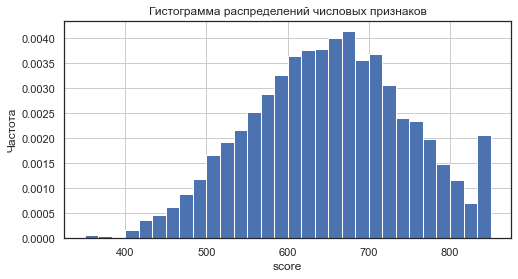

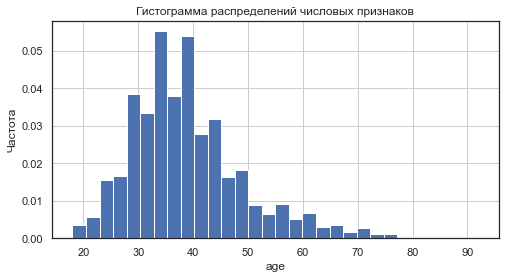

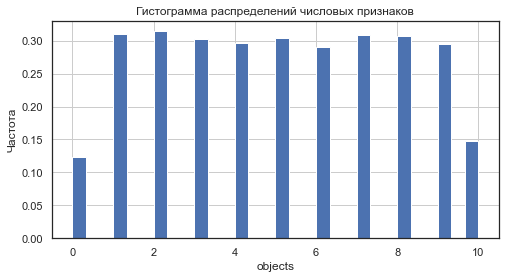

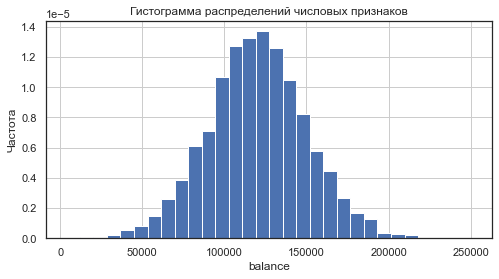

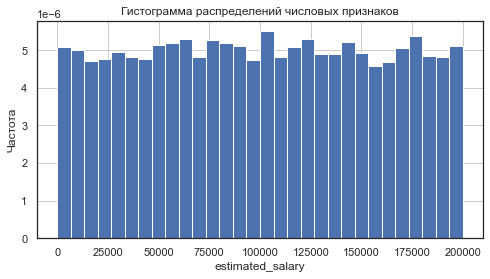

In [141]:
for i in numeric_feature:
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.hist(data[i], bins=30, density=True)
    ax.grid(True)
    ax.set_title('Гистограмма распределений числовых признаков')
    ax.set_xlabel(i)
    ax.set_ylabel('Частота')
    plt.show()

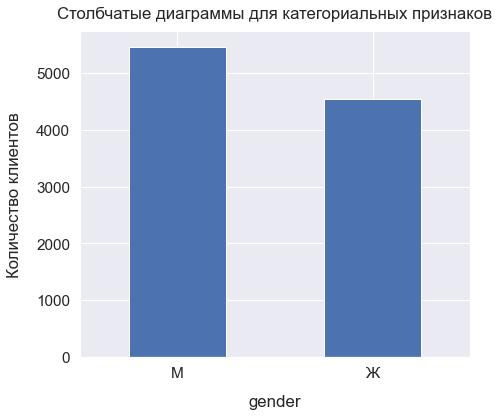

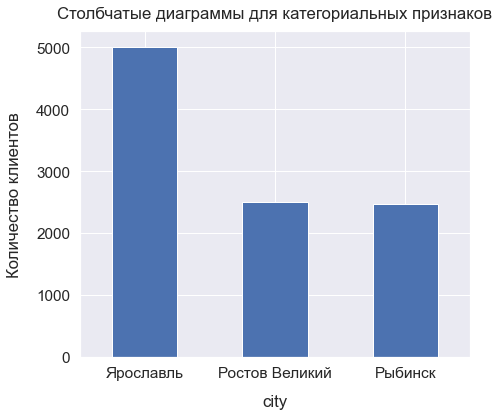

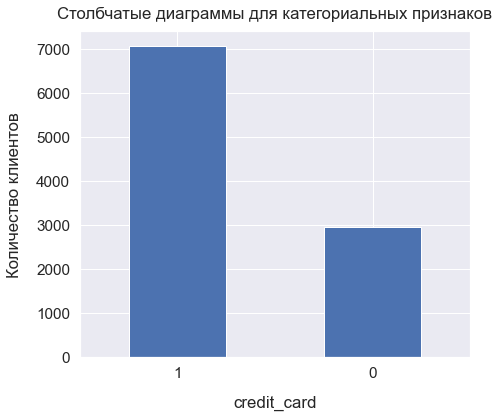

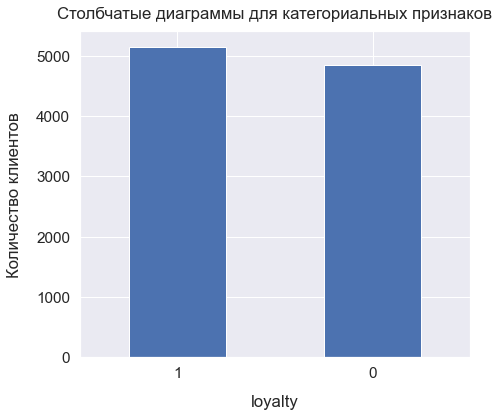

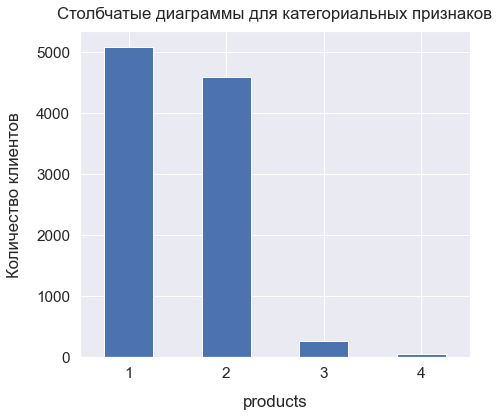

In [142]:
import seaborn as sns
for i in binar_feature:
    sns.set(font_scale=1.4)
    data[i].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
    plt.xlabel(i, labelpad=14)
    plt.ylabel("Количество клиентов", labelpad=14)
    plt.title("Cтолбчатые диаграммы для категориальных признаков", y=1.02)
    plt.show()

In [143]:
data.describe()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Вывод

 - Почти 80% клиентов остаются, 20 % уходят.
 - Большая часть клиентов находятся в Ярославле (головной офис)
 - У большинства есть кредитная карта (у~7000 человек есть, у ~3000 нет)
 - Мужчин больше,чем женщин
 - Лояльных и нелояльных клиентов практически поровну
 - У большинства 1 или 2 банковских продукта
 

Признаки score, age (скошены вправо, т.к. возраст клиентов 18+) и balance распределены нормально. Estimated_salary может быть так распределен так, потому что это расчетная величина, т.е. банк может не знать какая зарплата у клиента (если это не зарплатный проект) и она рассчитана по формулам.

Средний возраст клиента 39 лет, в среднем он имеет 5 объектов в собственности, средний кредитный рейтинг 650 баллов. Максимум используют 4 банковских продукта, в среднем 1.5 продукта.

# 3. Проверка гипотез

**Гипотеза 1**

- Нулевая гипотеза: различия дохода между теми клиентами, которые ушли и теми, которые остались нет
- Альтернативная гипотеза: различия дохода между теми клиентами, которые ушли и теми, которые остались есть

У нас в распоряжении 10000 наблюдений, что является достаточным количеством. Данные распределены не нормально. Для проверки гипотезы будем использовать критерий Стьюдента, так как он действителен для больших выборок даже при ненормальных распределениях.

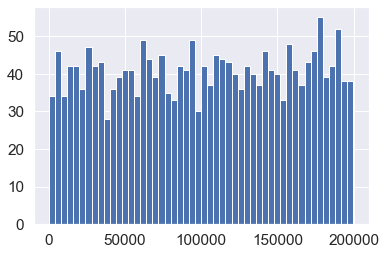

In [144]:
income_leaved = leaved['estimated_salary'].hist(bins=50)

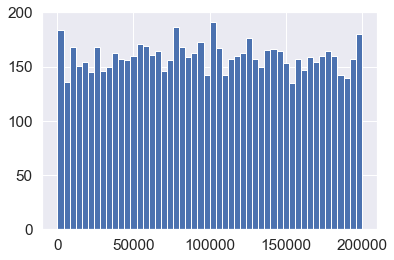

In [145]:
income_stayed = stayed['estimated_salary'].hist(bins=50)

In [146]:
from scipy import stats as st
income_leaved = leaved['estimated_salary']
income_stayed = stayed['estimated_salary']

alpha = 0.05

results = st.ttest_ind(income_leaved, income_stayed, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.228924613051458
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Исходя из результатов проверки Гипотезы 1 получается, что не важно какой доход был у клиента, различия дохода между теми клиентами, которые ушли и теми, которые остались нет.

**Гипотеза 2**

- Нулевая гипотеза: Кредитный рейтинг не оказывает влияния на отток клиентов.
- Альтернативная гипотеза: Кредитный рейтинг оказывает влияние на отток клиентов.

У нас в распоряжении 10000 наблюдений, что является достаточным количеством. Данные распределены нормально. Для проверки гипотезы будем использовать критерий Стьюдента.

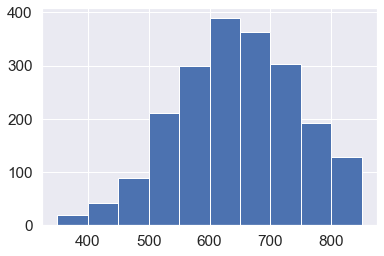

In [147]:
score_leaved = leaved['score'].hist()


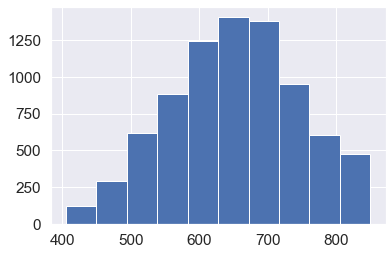

In [148]:
score_stayed = stayed['score'].hist()

In [149]:
score_leaved = leaved['score']
score_stayed = stayed['score']

alpha = 0.05

results = st.ttest_ind(score_leaved, score_stayed, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.008464728991832877
Отвергаем нулевую гипотезу


**Вывод**

Кредитный рейтинг оказывает влияние на отток клиентов.

# 4. Портреты клиентов, которые склонны уходить из банка

Для того, чтобы выяснить, кто из клиентов склонен к уходу и нарисовать портреты клиентов, необходимо проверить следующие зависимости:

- Есть ли зависимость между кредитным рейтингом и оттоком клиентов.
- Есть ли зависимость между полом и оттоком клиентов.
- Есть ли зависимость между возрастом и оттоком клиентов.
- Есть ли зависимость между количеством объектов в собственности и оттоком клиентов.
- Есть ли зависимость между балансом и оттоком клиентов.
- Есть ли зависимость между количеством используемых продуктов и оттоком клиентов.
- Есть ли зависимость между наличием кредитки и оттоком клиентов.
- Есть ли зависимость между лояльностью и оттоком клиентов.
- Есть ли зависимость между зарплатой и оттоком клиентов.

In [176]:
data.groupby("churn").mean().T.style.background_gradient("Reds", axis=1)

churn,0,1
user_id,15733903.881703,15732787.964654
score,651.853196,645.351497
age,37.408389,44.837997
objects,5.033279,4.932744
balance,119535.864270,120746.971132
products,1.544267,1.475209
credit_card,0.707146,0.699067
loyalty,0.554565,0.360825
estimated_salary,99738.391772,101465.677531


In [184]:
# для количества продуктов используем моду, чтобы посмотреть наиболее часто встречающееся значение.
leaved['products'].mode()

0    1
dtype: int64

In [185]:
stayed['products'].mode()

0    2
dtype: int64

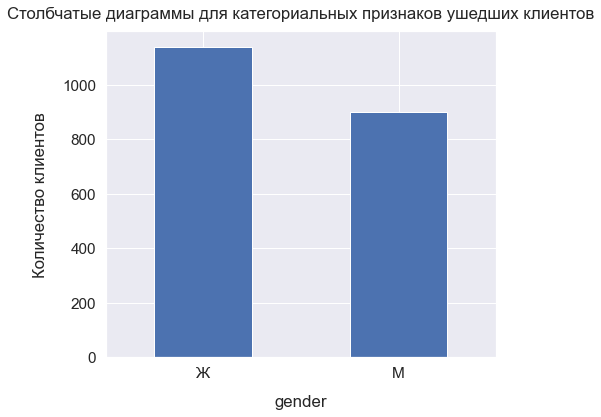

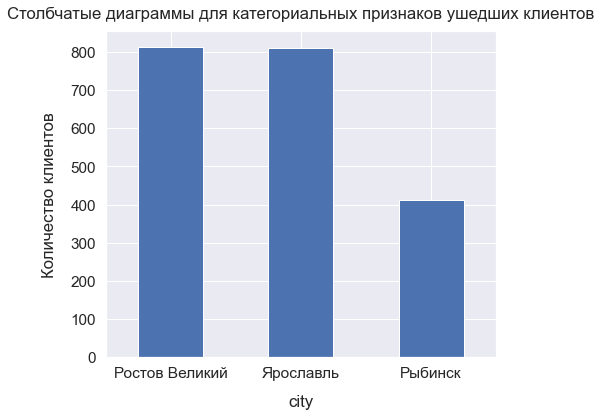

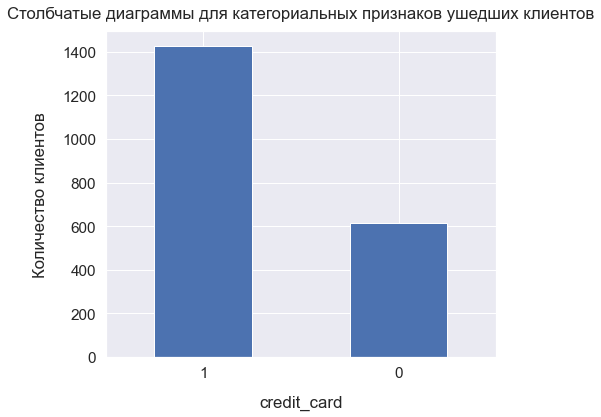

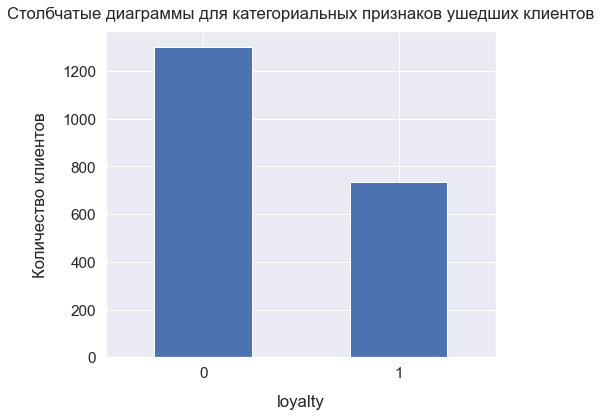

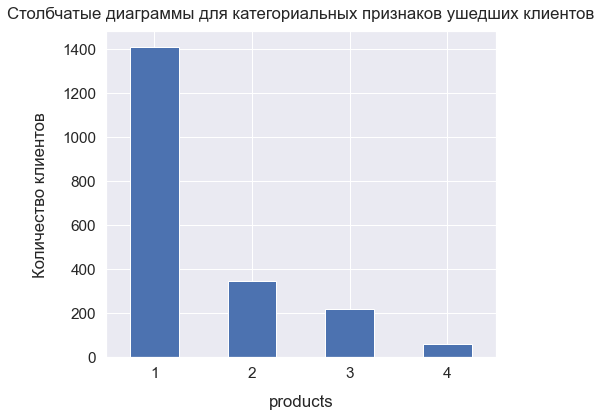

In [273]:
# построим диаграммы для категориальных признаков ушедших клиентов
for i in binar_feature:
    sns.set(font_scale=1.4)
    leaved[i].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
    plt.xlabel(i, labelpad=14)
    plt.ylabel("Количество клиентов", labelpad=14)
    plt.title("Cтолбчатые диаграммы для категориальных признаков ушедших клиентов", y=1.02)
    plt.show()

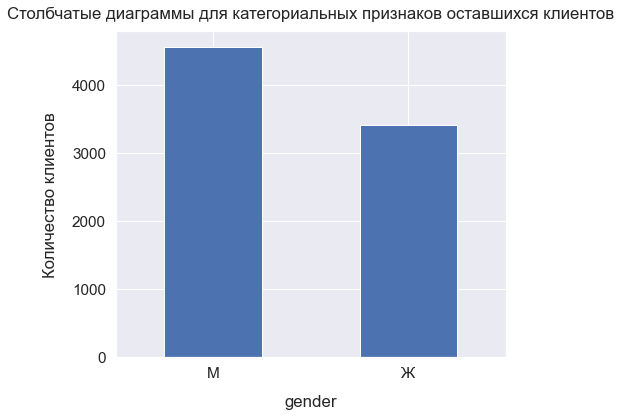

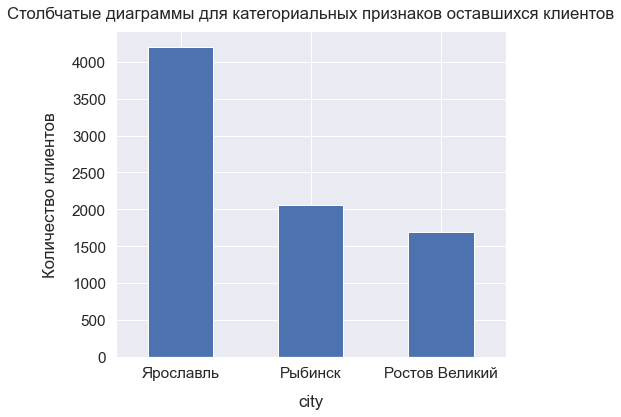

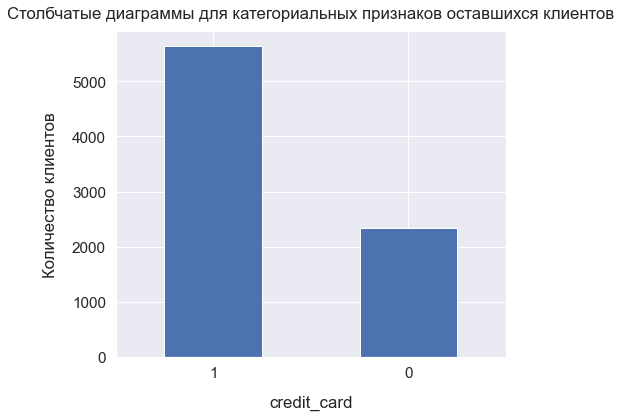

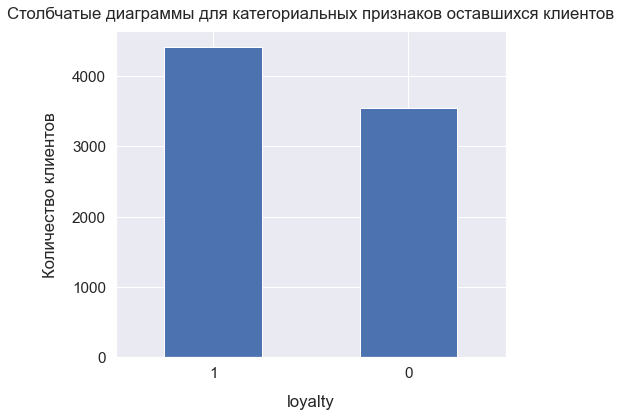

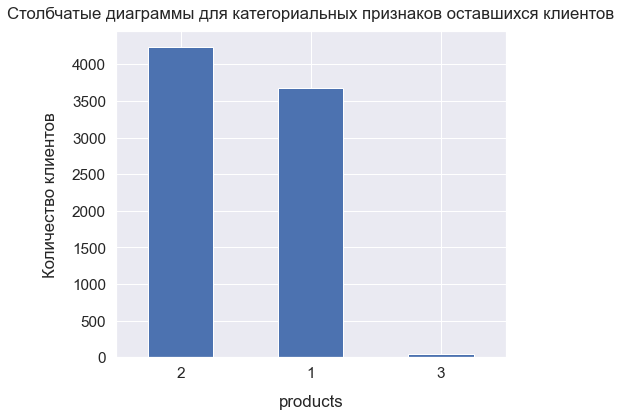

In [274]:
# построим диаграммы для категориальных признаков оставшихся клиентов
for i in binar_feature:
    sns.set(font_scale=1.4)
    stayed[i].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
    plt.xlabel(i, labelpad=14)
    plt.ylabel("Количество клиентов", labelpad=14)
    plt.title("Cтолбчатые диаграммы для категориальных признаков оставшихся клиентов", y=1.02)
    plt.show()

У отточных клиентов доля клиентов с кредитной картой значительно меньше, чем у оставшихся, так же у большинства отточников только 1 продукт. У оставшихся клиентов 1-2 продукта.

In [256]:
# построим гистограммы распределений числовых признаков
def figure_hist(sign_hist):
    plt.figure(figsize=(9,5))
    plt.hist(data[data['churn'] == 0][sign_hist], label='Остались')
    plt.hist(data[data['churn'] == 1][sign_hist], label='Ушли', alpha=0.9)
    plt.xlabel(sign_hist, fontsize=12, labelpad=12)
    plt.xticks(fontsize=10)
    plt.title('Гистограмма распределений числовых признаков', fontsize=14, pad=14)
    plt.legend()
    plt.ylabel('Количество человек', fontsize=12, labelpad=12)
    plt.yticks(fontsize=10)
    sns.despine()
    plt.grid(axis='y')
    plt.show()

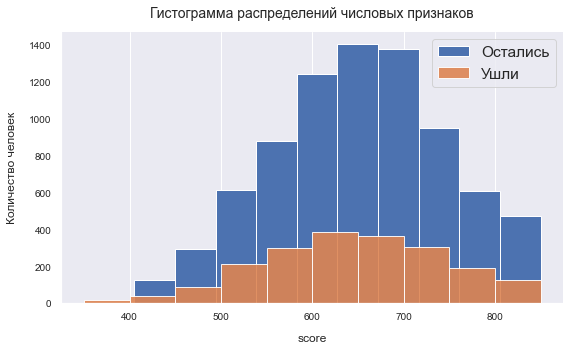

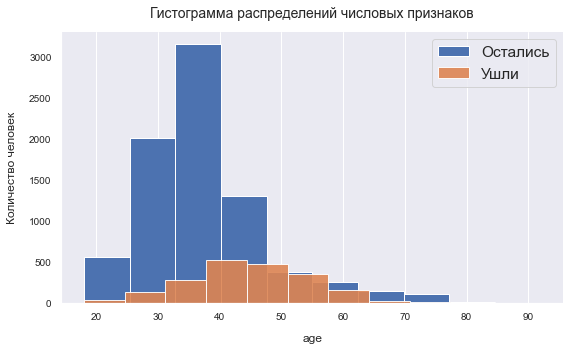

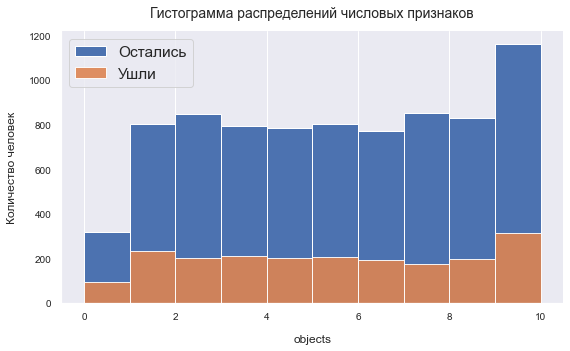

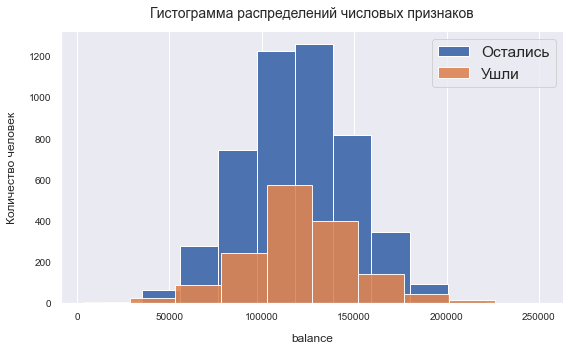

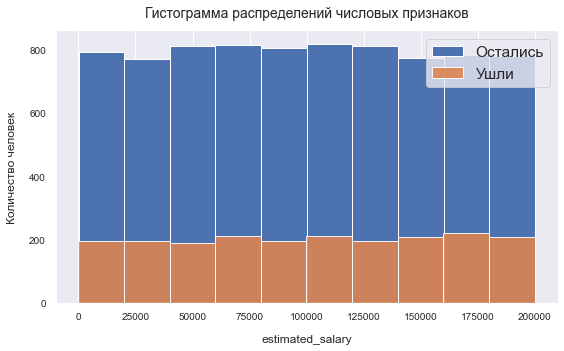

In [257]:
for i in numeric_feature:
    figure_hist(i)

Средний возраст ушедших клиентов выше, чем оставшихся (45 лет и 37 соответсвенно). Кредитный рейтинг немного ниже ушедших клиентов, чем оставшихся (645 и 651 соответственно).

- Есть ли зависимость между кредитным рейтингом и оттоком клиентов.

In [150]:
score_value = data['score'].quantile(q=[0.25,0.5,0.75]).reset_index()
score_value

,index,score
0,0.25,584.0
1,0.50,652.0
2,0.75,718.0


In [151]:
def score_level(score_num):
    if score_num < score_value.iloc[0][1]:
        return 'очень низкий'
    if score_num < score_value.iloc[1][1]:
        return 'низкий'
    if score_num <= score_value.iloc[2][1]:
        return 'средний'
    return 'высокий'

In [152]:
data['score_level'] = data['score'].apply(score_level)

In [153]:
data_pivot_score = data.pivot_table(index=['score_level'], values='churn', aggfunc=['sum', 'count'])
data_pivot_score['ratio'] = data_pivot_score['sum', 'churn'] / data_pivot_score['count', 'churn']
data_pivot_score.sort_values('ratio', ascending = False)

,sum,count,ratio
,churn,churn,
score_level,,,
очень низкий,548,2491,0.219992
низкий,526,2496,0.210737
высокий,500,2463,0.203004
средний,463,2550,0.181569


Клиенты с очень низким и низким кредитным рейтингом (меньше 652 баллов) более склонны к уходу, чем со средним и высоким рейтингом (от 652 баллов и от 718 соответственно).

- Есть ли зависимость между полом и оттоком клиентов.

In [154]:
data_pivot_gender = data.pivot_table(index=['gender'], values='churn', aggfunc=['sum', 'count'])
data_pivot_gender['ratio'] = data_pivot_gender['sum', 'churn'] / data_pivot_gender['count', 'churn']
data_pivot_gender.sort_values('ratio', ascending = False)

,sum,count,ratio
,churn,churn,
gender,,,
Ж,1139,4543,0.250715
М,898,5457,0.164559


Клиенты мужского пола, менее склонны у уходу, чем женщины.

- Есть ли зависимость между возрастом и оттоком клиентов

In [155]:
age_value = data['age'].quantile(q=[0.25,0.5,0.75]).reset_index()
age_value

,index,age
0,0.25,32.0
1,0.50,37.0
2,0.75,44.0


In [156]:
def age_level(age_num):
    if age_num < age_value.iloc[0][1]:
        return 'до 32 лет'
    if age_num < age_value.iloc[1][1]:
        return '33 - 37 лет'
    if age_num <= age_value.iloc[2][1]:
        return '38 - 44 года'
    return 'старше 44 лет'

In [157]:
data['age_level'] = data['age'].apply(age_level)

In [158]:
data_pivot_age = data.pivot_table(index=['age_level'], values='churn', aggfunc=['sum', 'count'])
data_pivot_age['ratio'] = data_pivot_age['sum', 'churn'] / data_pivot_age['count', 'churn']
data_pivot_age.sort_values('ratio', ascending = False)

,sum,count,ratio
,churn,churn,
age_level,,,
старше 44 лет,1044,2340,0.446154
38 - 44 года,593,3051,0.194363
33 - 37 лет,219,2237,0.097899
до 32 лет,181,2372,0.076307


Отток клиентов возраста до 44 лет незначительный, после 44 лет он резко возрастает и составляет 44 %.

- Есть ли зависимость между количеством объектов в собственности и оттоком клиентов.

In [159]:
data_pivot_own = data.pivot_table(index=['objects'], values='churn', aggfunc=['sum', 'count'])
data_pivot_own['ratio'] = data_pivot_own['sum', 'churn'] / data_pivot_own['count', 'churn']
data_pivot_own.sort_values('ratio', ascending = False)

,sum,count,ratio
,churn,churn,
objects,,,
0,95,413,0.230024
1,232,1035,0.224155
9,213,984,0.216463
3,213,1009,0.211100
5,209,1012,0.206522
10,101,490,0.206122
4,203,989,0.205258
6,196,967,0.202689


Наибольший отток клиентов, которые не имеют объектов в собственности либо только 1 объект.

- Есть ли зависимость между балансом и оттоком клиентов.

In [160]:
balance_value = data['balance'].quantile(q=[0.25,0.5,0.75]).reset_index()
balance_value

,index,balance
0,0.25,100181.975
1,0.50,119839.690
2,0.75,139512.290


In [161]:
def balance_level(balance_num):
    if balance_num < balance_value.iloc[0][1]:
        return 'низкий'
    if balance_num < balance_value.iloc[1][1]:
        return 'средний'
    if balance_num <= balance_value.iloc[2][1]:
        return 'выше среднего'
    return 'высокий'

In [162]:
data['balance_level'] = data['balance'].apply(balance_level)

In [163]:
data_pivot_balance = data.pivot_table(index=['balance_level'], values='churn', aggfunc=['sum', 'count'])
data_pivot_balance['ratio'] = data_pivot_balance['sum', 'churn'] / data_pivot_balance['count', 'churn']
data_pivot_balance.sort_values('ratio', ascending = False)

,sum,count,ratio
,churn,churn,
balance_level,,,
средний,436,1595,0.273354
выше среднего,405,1596,0.253759
низкий,329,1596,0.206140
высокий,867,5213,0.166315


Наименее склонны к оттоку клиеты с балансом (остатком на дебетовой карте) выше 139 000 у.е. и менее 100 000 у.е.

- Есть ли зависимость между количеством используемых продуктов и оттоком клиентов

In [164]:
data_pivot_use = data.pivot_table(index=['products'], values='churn', aggfunc=['sum', 'count'])
data_pivot_use['ratio'] = data_pivot_use['sum', 'churn'] / data_pivot_use['count', 'churn']
data_pivot_use.sort_values('ratio', ascending = False)

,sum,count,ratio
,churn,churn,
products,,,
4,60,60,1.000000
3,220,266,0.827068
1,1409,5084,0.277144
2,348,4590,0.075817


Очень склонны к уходу клиенты, использующие большое количество продуктов банка (3 и 4). Те, кто использует 2 продукта банка наименее склонны к уходу.

- Есть ли зависимость между наличием кредитки и оттоком клиентов.

In [165]:
data_pivot_credit = data.pivot_table(index=['credit_card'], values='churn', aggfunc=['sum', 'count'])
data_pivot_credit['ratio'] = data_pivot_credit['sum', 'churn'] / data_pivot_credit['count', 'churn']
data_pivot_credit.sort_values('ratio', ascending = False)

,sum,count,ratio
,churn,churn,
credit_card,,,
0,613,2945,0.208149
1,1424,7055,0.201843


Наличие или отсутсвие кредитной карты не влияет на отток клиентов.

<span style="color:red">Комментарий тимлида (итерация 1)</span>

Здесь была кодовая ячейка, в которой был записан текст - поэтому далее код упал. Проверяй прежде чем отправлять на проверку.

- Есть ли зависимость между лояльностью и оттоком клиентов

In [166]:
data_pivot_loyal = data.pivot_table(index=['loyalty'], values='churn', aggfunc=['sum', 'count'])
data_pivot_loyal['ratio'] = data_pivot_loyal['sum', 'churn'] / data_pivot_loyal['count', 'churn']
data_pivot_loyal.sort_values('ratio', ascending = False)

,sum,count,ratio
,churn,churn,
loyalty,,,
0,1302,4849,0.268509
1,735,5151,0.142691


Лояльные клиенты реже уходят из банка.

- Есть ли зависимость между зарплатой и оттоком клиентов.

In [167]:
salary_value = data['estimated_salary'].quantile(q=[0.25,0.5,0.75]).reset_index()
salary_value

,index,estimated_salary
0,0.25,51002.1100
1,0.50,100193.9150
2,0.75,149388.2475


In [168]:
def salary_level(salary_num):
    if salary_num < salary_value.iloc[0][1]:
        return 'низкая'
    if salary_num < salary_value.iloc[1][1]:
        return 'средняя'
    if salary_num <= salary_value.iloc[2][1]:
        return 'выше среднего'
    return 'высокая'

In [169]:
data['salary_level'] = data['estimated_salary'].apply(salary_level)

In [170]:
data_pivot_salary = data.pivot_table(index=['salary_level'], values='churn', aggfunc=['sum', 'count'])
data_pivot_salary['ratio'] = data_pivot_salary['sum', 'churn'] / data_pivot_salary['count', 'churn']
data_pivot_salary.sort_values('ratio', ascending = False)

,sum,count,ratio
,churn,churn,
salary_level,,,
высокая,539,2500,0.2156
выше среднего,503,2500,0.2012
низкая,500,2500,0.2000
средняя,495,2500,0.1980


Люди с высоким доходом (от 150 000 у.е.) чуть более склонны уходу, но в целом отношение ушедших клиентов к общему количеству во всех группах (разделенных по уровню дохода) практически одинаково.

# Вывод

Склонны к уходу:
- клиенты с очень низким и низким кредитным рейтингом (меньше 652 баллов)
- клиенты старше 44 лет
- клиенты, которые не имеют никаких объектов в собственности либо только 1 объект
- клиенты с балансом (остатком на дебетовой карте) выше 100 000 у.е., но менее 139 000 у.е.
- клиенты, использующие большое количество продуктов банка (3 и 4) либо только 1
- не лояльные клиенты чаще уходят из банка.
    

Возраст клиента и количество продуктов, которые он использует, оказывают наибольшее влияние на то, уйдет клиент или нет.

Соотношение отточных клиентов с кредитной картой к клиентам без кредитной карты и оставшихся с кредитной картой к клиентам без кредитной карты практически одинаково. Но в численном отношении оставшихся клиентов с кредитной картой значительно больше, чем ушедших имеющих кредитную карту.

# Общий вывод

В этом исследовании были проанализированы данные и выяснилось, что 80% клиентов остаются, а 20% уходят. 

Необходимо проверять кредитный рейтинг клиента и не допускать выдачи большого количества банковских продуктов (3 и 4), т.к. почти 100% клиентов ушли, имея такое количество продуктов. Оптимальное количество продуктов 2. 

В процентном соотношении наличие или отсутвие кредитной карты не влияет на отток, но ее можно предлагать бесплатно, для тех клиетов, у которых есть только 1 банковский продукт для повышения лояльности и уменьшения оттока, так как клиенты с двумя банковскими продуктами наименее склонны к уходу.

Необходимо разделить клиентов по возрастным группам и таргетировать под них услуги, так как возраст ушедших клиентов в среднем выше, чем у оставшихся.

Так же необходимо разработать программу лояльности клиентов (при ее отсутствии) или доработать её.

Ссылка на презентацию: https://drive.google.com/file/d/1DDBOBi_vpCSBAlfxVjpTjqlH2U_xPhy-/view?usp=sharing